# Baye's Theorem

In [761]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import newton
from scipy.optimize import minimize
from scipy.special import binom


In [762]:
prob_data = quad(lambda p: p**550*(1-p)**450*binom(1000,550),0,1)
print(prob_data)

(0.0009990009990011805, 2.863325041300749e-11)


In [763]:
binom(1000,550)

np.float64(1.8151060634810574e+297)

In [764]:
def posterior(p):
    return p**550*(1-p)**450*binom(1000,550)/prob_data[0]

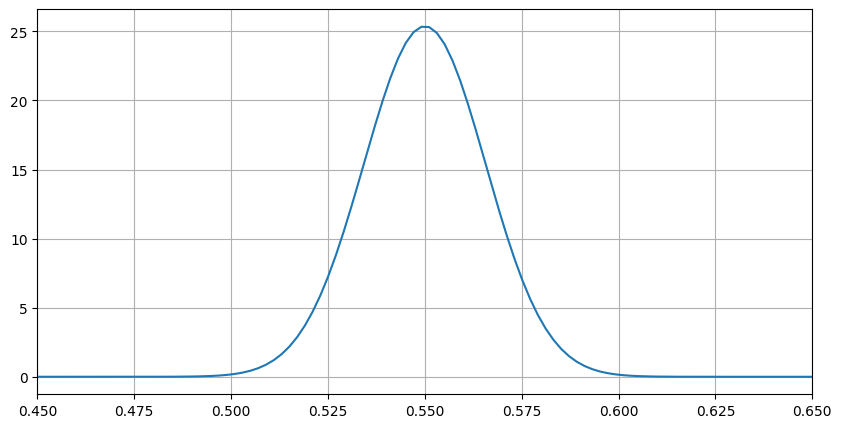

In [765]:
fig, ax = plt.subplots(figsize=(10,5))

plist=np.linspace(0,1,500)
ax.plot(plist,posterior(plist))
ax.set_xlim(0.45,0.65)
plt.grid()
plt.show()


In [766]:
quad(posterior,0.51,1)

(0.9943084318047302, 2.474266911283796e-10)

In [767]:
num_sims = 10000
heads55 = []
heads50 = []
for i in range(num_sims):
    temp55=(np.random.rand(1000)<0.55).sum()
    temp50=(np.random.rand(1000)<0.5).sum()
    heads55.append(temp55)
    heads50.append(temp50)

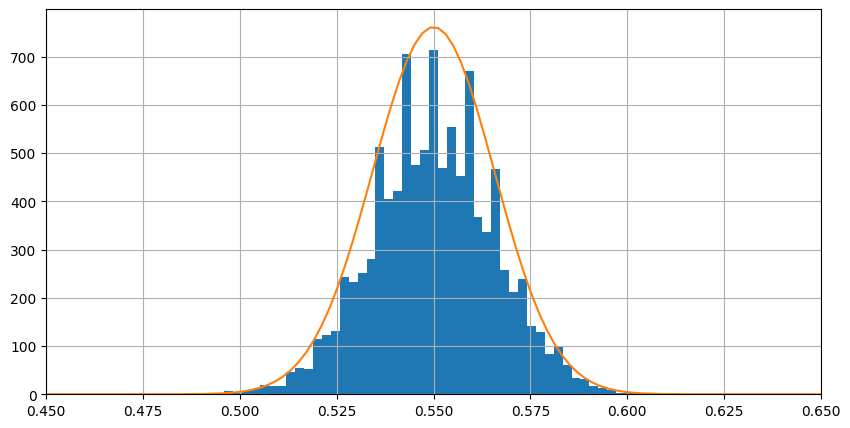

In [768]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(np.array(heads55)/1000, bins=50)
# ax.hist(heads50, bins=50)
ax.plot(plist,30*posterior(plist))
ax.set_xlim(0.45,0.65)
plt.grid()
plt.show()

In [769]:
num_sims = 10000
heads55_10k = []
heads50_10k = []
heads55_100 = []
heads50_100 = []
for i in range(num_sims):
    temp55=(np.random.rand(10000)<0.55).sum()/10000
    temp50=(np.random.rand(10000)<0.5).sum()/10000
    heads55_10k.append(temp55)
    heads50_10k.append(temp50)
    temp55_100=(np.random.rand(100)<0.55).sum()/100
    temp50_100=(np.random.rand(100)<0.5).sum()/100
    heads55_100.append(temp55_100)
    heads50_100.append(temp50_100)

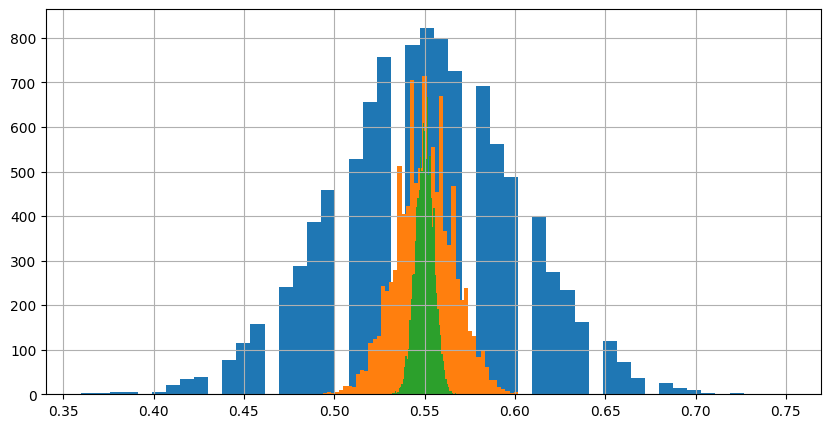

In [770]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(heads55_100, bins=50)
ax.hist(np.array(heads55)/1000,bins=50)
ax.hist(heads55_10k, bins=50)
plt.grid()
plt.show()

In [771]:
time = np.linspace(0,1,1000)
data = 0.07*time+np.random.randn(1000)


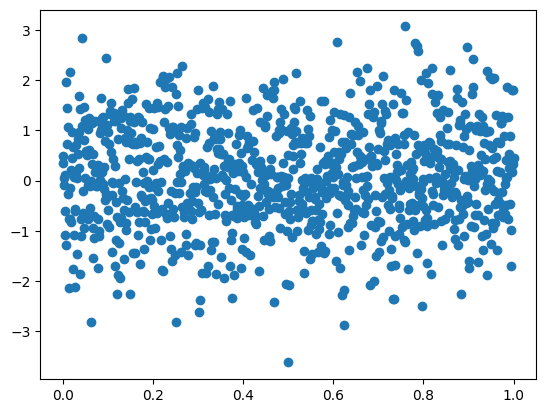

In [772]:
plt.scatter(time,data)

In [773]:
def chisqr(a,b=0):
    return ((data-a*time-b)**2).sum()


In [774]:
chimin = minimize(chisqr,0.1, method='Nelder-Mead')
print(chimin)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1034.0569815608
             x: [ 1.686e-01]
           nit: 13
          nfev: 26
 final_simplex: (array([[ 1.686e-01],
                       [ 1.685e-01]]), array([ 1.034e+03,  1.034e+03]))


In [775]:
chi0 = chimin['fun']
print(chi0)

1034.0569815608


In [776]:
p68L = newton(lambda x:chisqr(x)-chi0-1, 0.07)
p68R = newton(lambda x:chisqr(x)-chi0-1, 0.08)
p95L = newton(lambda x:chisqr(x)-chi0-4, 0.07)
p95R = newton(lambda x:chisqr(x)-chi0-4, 0.08)

In [777]:
print(p68L,p68R)
print(p95L,p95R)

0.11379704499843435 0.11379704499882759
0.059038497516394624 0.05903849751644244


In [778]:
alist = np.linspace(-0.03, 0.18, 300)
chilist = np.zeros(len(alist), dtype=float)
for i in range(len(alist)):
    chilist[i] = chisqr(alist[i])

(1033.5, 1040.0)

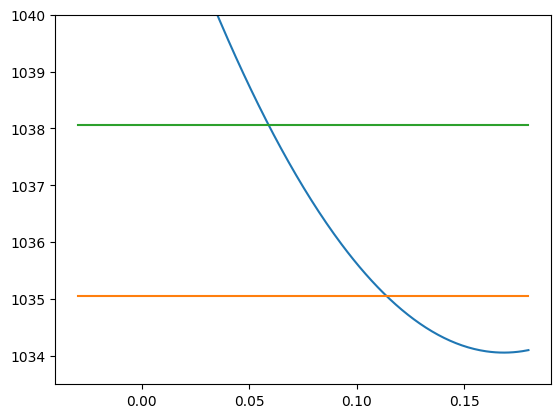

In [779]:
plt.plot(alist,chilist)
plt.plot([-0.03,0.18],[chi0+1,chi0+1])
plt.plot([-0.03,0.18],[chi0+4,chi0+4])
plt.ylim(1033.5,1040)

In [780]:
chiminab = minimize(lambda X:chisqr(X[0],X[1]),[0.1,0], method='Nelder-Mead')
print(chiminab)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1033.8865220071475
             x: [ 1.295e-01  2.608e-02]
           nit: 41
          nfev: 77
 final_simplex: (array([[ 1.295e-01,  2.608e-02],
                       [ 1.294e-01,  2.611e-02],
                       [ 1.295e-01,  2.606e-02]]), array([ 1.034e+03,  1.034e+03,  1.034e+03]))


In [793]:
As=np.linspace(-0.2,0.5, 300)
Bs=np.linspace(-0.2,0.2, 300)

A,B = np.meshgrid(As,Bs,indexing='ij')

In [794]:
chimesh = np.zeros(A.shape, dtype=float)


In [795]:
for i in range(len(As)):
    for j in range(len(Bs)):
        chimesh[i,j] = chisqr(A[i,j],B[i,j])

In [796]:
chiab0 = chiminab['fun']

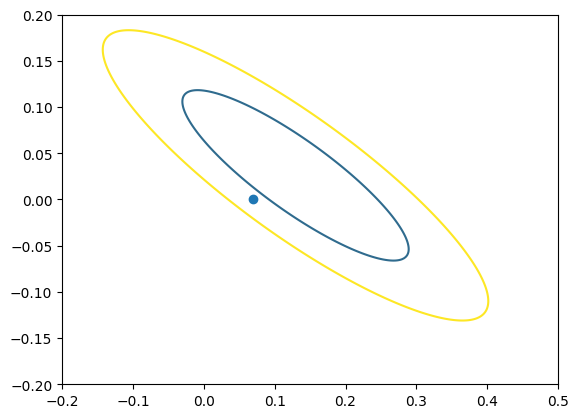

In [798]:
plt.contour(A,B,chimesh, levels=[chiab0, chiab0+2.13, chiab0+6.18])
plt.scatter([0.07],[0])
plt.show()
